In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:
data = pd.read_csv('airdata/Delhi-2011.csv')
data=data.rename(columns = {'Sampling Date':'Sampling_Date'})
for i in range(data.shape[0]):
    
    if '-' in data['Sampling_Date'][i]:
        data['Sampling_Date'][i] = pd.to_datetime(data['Sampling_Date'][i],format = '%d-%m-%y')
        
    else:
        data['Sampling_Date'][i] = pd.to_datetime(data['Sampling_Date'][i],format = '%d/%m/%Y')
        

print data.Sampling_Date


    
data.index = data['Sampling_Date']
data = data.sort_values(by='Sampling_Date')
del data['Sampling_Date']
print data

/home/demonicode/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0      2011-04-01 00:00:00
1      2011-07-01 00:00:00
2      2011-12-01 00:00:00
3      2011-01-17 00:00:00
4      2011-01-20 00:00:00
5      2011-01-25 00:00:00
6      2011-01-02 00:00:00
7      2011-04-02 00:00:00
8      2011-09-02 00:00:00
9      2011-02-14 00:00:00
10     2011-02-18 00:00:00
11     2011-02-23 00:00:00
12     2011-01-03 00:00:00
13     2011-07-03 00:00:00
14     2011-10-03 00:00:00
15     2011-03-15 00:00:00
16     2011-03-18 00:00:00
17     2011-03-23 00:00:00
18     2011-03-28 00:00:00
19     2011-01-04 00:00:00
20     2011-06-04 00:00:00
21     2011-11-04 00:00:00
22     2011-04-18 00:00:00
23     2011-04-21 00:00:00
24     2011-04-27 00:00:00
25     2011-03-05 00:00:00
26     2011-06-05 00:00:00
27     2011-11-05 00:00:00
28     2011-05-16 00:00:00
29     2011-05-20 00:00:00
              ...         
706    2011-09-13 00:00:00
707    2011-09-14 00:00:00
708    2011-09-15 00:00:00
709    2011-09-27 00:00:00
710    2011-09-28 00:00:00
711    2011-09-29 00:00:00
7

In [3]:
for j in range(2012,2016):
    
    print j
    filey = 'airdata/Delhi-'+str(j)+'.csv'
    data2 = pd.read_csv(filey)
    data2=data2.rename(columns = {'Sampling Date':'Sampling_Date'})
    for i in range(data2.shape[0]):
    
        if '-' in data2['Sampling_Date'][i]:
            data2['Sampling_Date'][i] = pd.to_datetime(data2['Sampling_Date'][i],format = '%d-%m-%y')
        
        else:
            data2['Sampling_Date'][i] = pd.to_datetime(data2['Sampling_Date'][i],format = '%d/%m/%Y')
    
    data2.index = data2['Sampling_Date']
    data2 = data2.sort_values(by='Sampling_Date')
    del data2['Sampling_Date']
    
    
    data = pd.concat([data,data2])

2012


/home/demonicode/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


2013


/home/demonicode/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


2014
2015


In [280]:
data.index

DatetimeIndex(['2011-01-02', '2011-01-02', '2011-01-02', '2011-01-03',
               '2011-01-03', '2011-01-03', '2011-01-03', '2011-01-04',
               '2011-01-04', '2011-01-06',
               ...
               '2015-12-29', '2015-12-29', '2015-12-30', '2015-12-30',
               '2015-12-30', '2015-12-30', '2015-12-30', '2015-12-31',
               '2015-12-31', '2015-12-31'],
              dtype='datetime64[ns]', name=u'Sampling_Date', length=2760, freq=None)

In [281]:
data=data.rename(columns = {'Location of Monitoring Station':'Location_of_Monitoring_Station'})

list_of_areas = data.Location_of_Monitoring_Station.unique()
print list_of_areas

['Nizamuddin, Delhi' 'Pritampura, Delhi'
 'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi'
 'Mayapuri Industrial Area, Delhi' 'Shahzada Bagh, Delhi'
 'Siri Fort, Delhi' 'Shahadra, Delhi' 'Janakpuri, Delhi'
 'N.Y. SCHOOL, Sarojini Nagar, Delhi']


In [282]:
data.drop_duplicates(inplace=True)

Nizamuddin, Delhi


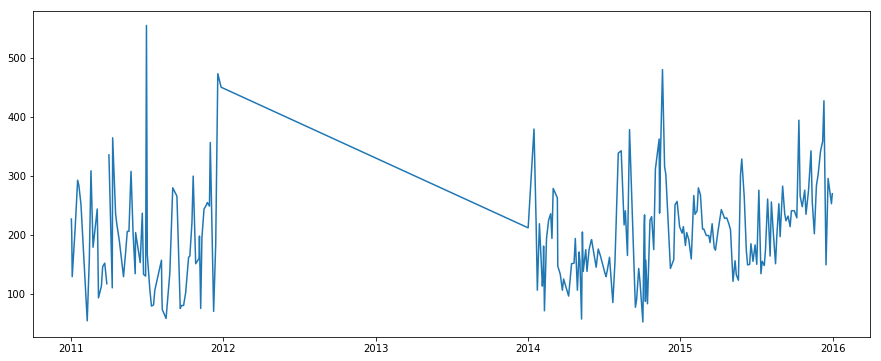

Pritampura, Delhi


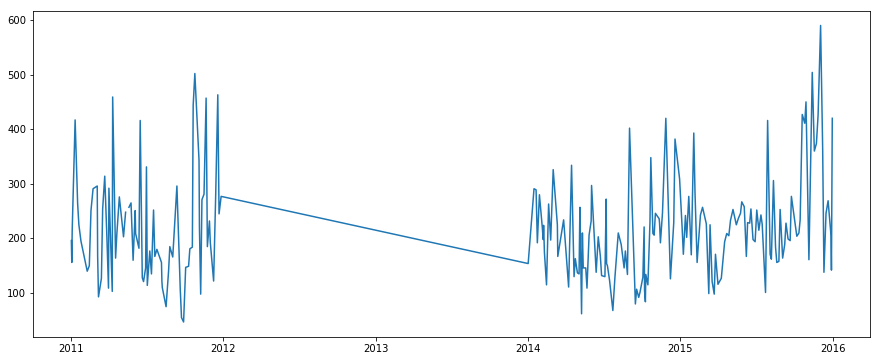

Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi


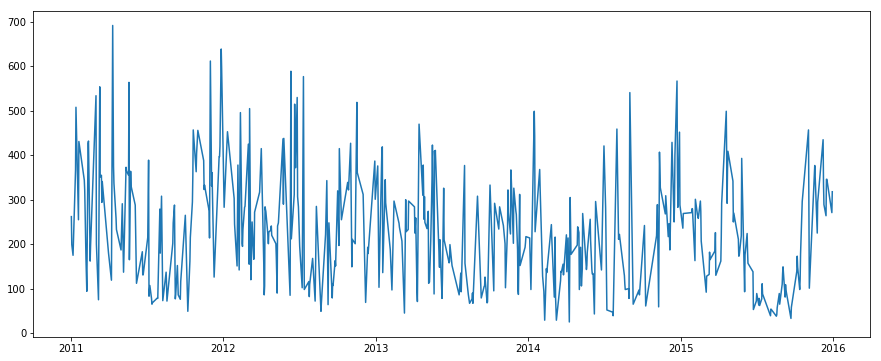

Mayapuri Industrial Area, Delhi


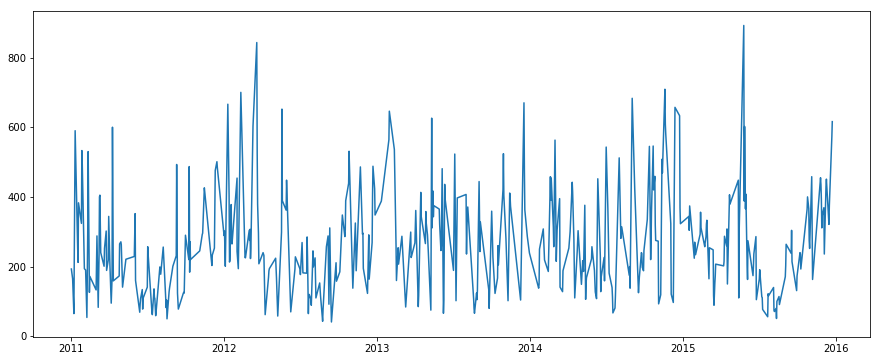

Shahzada Bagh, Delhi


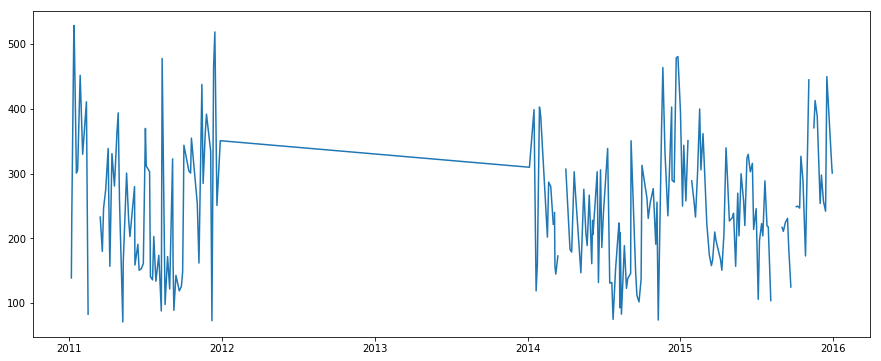

Siri Fort, Delhi


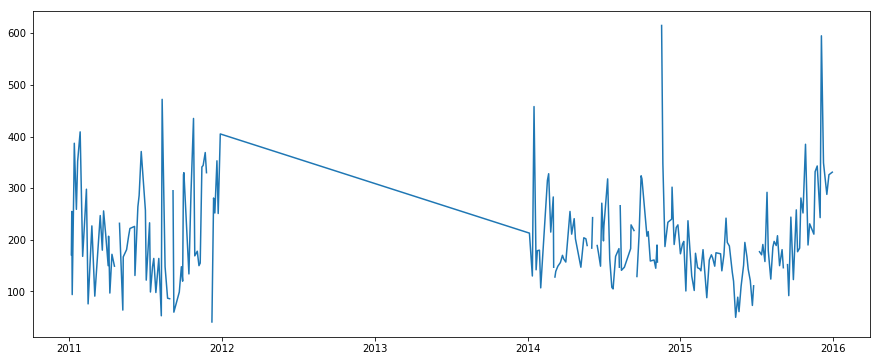

Shahadra, Delhi


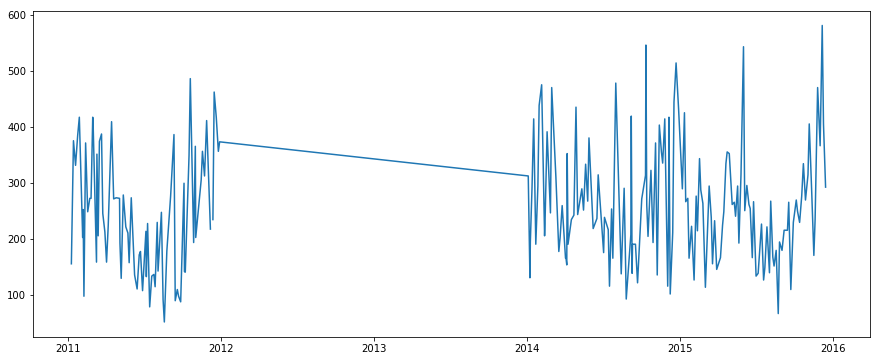

Janakpuri, Delhi


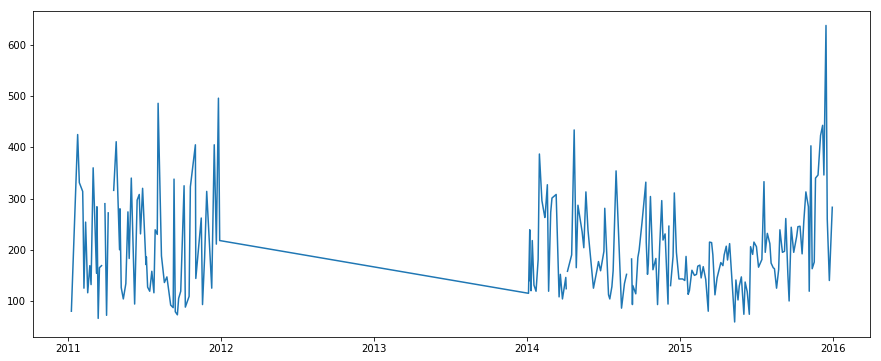

N.Y. SCHOOL, Sarojini Nagar, Delhi


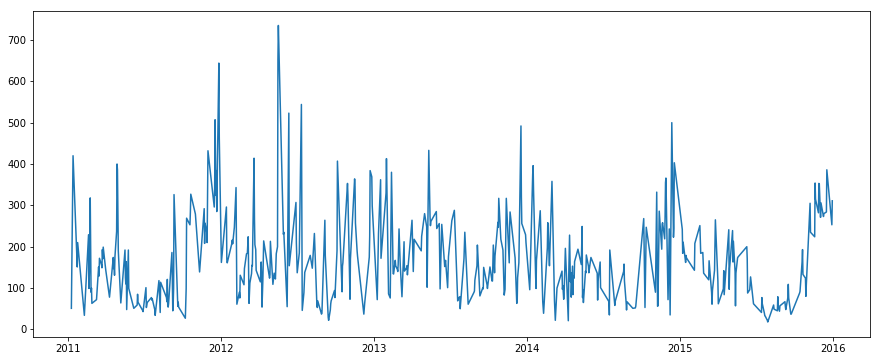

In [283]:
for area in list_of_areas:
    print area
    area1 = data.loc[data['Location_of_Monitoring_Station'] == area]
    ts = area1['RSPM/PM10'] 
    ts.head(10)
    plt.plot(ts)
    plt.show()

In [284]:
area1 = data.loc[data['Location_of_Monitoring_Station'] == 'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi']

In [285]:
ts = area1['RSPM/PM10']
ts.dropna(inplace=True)


In [286]:
print ts

Sampling_Date
2011-01-02    262.0
2011-01-03    199.0
2011-01-06    175.0
2011-01-12    367.0
2011-01-13    508.0
2011-01-18    306.0
2011-01-19    255.0
2011-01-20    431.0
2011-02-02    344.0
2011-02-03    321.0
2011-02-06    167.0
2011-02-08     94.0
2011-02-11    427.0
2011-02-12    432.0
2011-02-16    162.0
2011-02-17    197.0
2011-03-02    534.0
2011-03-03    200.0
2011-03-08     75.0
2011-03-11    554.0
2011-03-12    351.0
2011-03-15    355.0
2011-03-16    294.0
2011-03-17    341.0
2011-04-01    180.0
2011-04-08    119.0
2011-04-11    692.0
2011-04-13    375.0
2011-04-14    337.0
2011-04-19    259.0
              ...  
2015-09-02    134.0
2015-09-03    149.0
2015-09-08     81.0
2015-09-09    109.0
2015-09-10     97.0
2015-09-22     33.0
2015-09-23     58.0
2015-10-06    139.0
2015-10-07    173.0
2015-10-08    149.0
2015-10-13     98.0
2015-10-14    121.0
2015-10-15    178.0
2015-10-19    296.0
2015-11-03    457.0
2015-11-04    260.0
2015-11-05    101.0
2015-11-18    377.0
2015-1

In [287]:
X_final = ts['2015']

In [288]:
train = ts['2011':'2014']

In [289]:
ts = train
print train

Sampling_Date
2011-01-02    262.0
2011-01-03    199.0
2011-01-06    175.0
2011-01-12    367.0
2011-01-13    508.0
2011-01-18    306.0
2011-01-19    255.0
2011-01-20    431.0
2011-02-02    344.0
2011-02-03    321.0
2011-02-06    167.0
2011-02-08     94.0
2011-02-11    427.0
2011-02-12    432.0
2011-02-16    162.0
2011-02-17    197.0
2011-03-02    534.0
2011-03-03    200.0
2011-03-08     75.0
2011-03-11    554.0
2011-03-12    351.0
2011-03-15    355.0
2011-03-16    294.0
2011-03-17    341.0
2011-04-01    180.0
2011-04-08    119.0
2011-04-11    692.0
2011-04-13    375.0
2011-04-14    337.0
2011-04-19    259.0
              ...  
2014-08-21     98.0
2014-08-29    100.0
2014-08-30     78.0
2014-09-01    541.0
2014-09-07    182.0
2014-09-09     65.0
2014-09-23     97.0
2014-09-24     86.0
2014-10-06    242.0
2014-10-07    168.0
2014-10-09     61.0
2014-11-04    219.0
2014-11-06    289.0
2014-11-09     59.0
2014-11-11    407.0
2014-11-13    327.0
2014-11-25    268.0
2014-11-26    309.0
2014-1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Month=1, Predicted=158.442284, Expected=87.000000
Month=2, Predicted=139.314106, Expected=67.000000
Month=3, Predicted=124.356492, Expected=77.000000
Month=4, Predicted=115.611135, Expected=90.000000
Month=5, Predicted=108.487684, Expected=67.000000
Month=6, Predicted=130.316194, Expected=308.000000
Month=7, Predicted=124.268313, Expected=79.000000
Month=8, Predicted=114.537005, Expected=105.000000
Month=9, Predicted=108.504400, Expected=106.000000
Month=10, Predicted=108.006862, Expected=126.000000
Month=11, Predicted=102.316423, Expected=68.000000
Month=12, Predicted=95.328974, Expected=70.000000
Month=13, Predicted=126.275471, Expected=333.000000
Month=14, Predicted=124.376374, Expected=95.000000
M

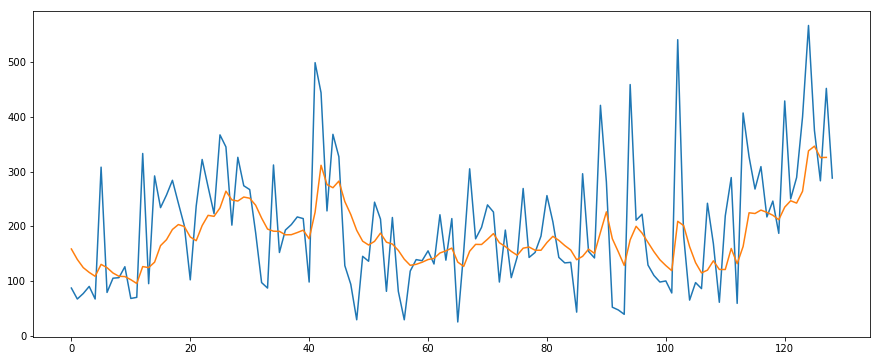

In [290]:
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		print i
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]



train_size = int(len(ts) * 0.66)
# transform data to be stationary
raw_values = ts.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[1:train_size], supervised_values[train_size:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1,100, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[train_size+1:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[train_size:])
pyplot.plot(predictions)
pyplot.show()

In [273]:
print expected



452.0


In [291]:
predictions = list()
for i in range(92):
    X = test_scaled[100,-1:] #(my last observation)
    yhat = forecast_lstm(lstm_model, 1, X)
    yhat = invert_scale(scaler, X, yhat)
    yhat = inverse_difference(raw_values, yhat, 1)
    predictions.append(yhat)
    print(yhat)

210.389015794
238.854147136
261.710413635
280.340585396
295.90825431
309.2355121
320.917718388
331.395874932
341.004312083
350.002756044
358.598733827
366.963482454
375.243886247
383.571780547
392.071437016
400.866378784
410.085729241
419.870827317
430.382556021
441.810093582
454.381855309
468.379037678
484.15373981
502.151709378
522.941029727
547.246089816
575.982040107
610.275892496
651.443131685
700.862103224
759.678849697
826.151576996
899.582890272
978.252816439
1059.2059865
1138.44664526
1214.09887457
1284.88482785
1349.95937943
1408.87983847
1461.56092739
1507.58321857
1539.5517683
1563.16010761
1583.34116697
1600.83711195
1615.98817492
1629.10536814
1640.4662199
1650.31377125
1658.85895872
1666.28274632
1672.74026394
1678.36431885
1683.26828003
1687.549088
1691.28976297
1694.56191301
1697.4266119
1699.93690729
1702.13794613
1704.0694828
1705.76525211
1707.2551012
1708.56436253
1709.71560955
1710.72840595
1711.61955643
1712.40410995
1713.09460735
1713.70308781
1714.23908234
1714

In [292]:
print len(predictions)

92


Test RMSE: 200.386


<function matplotlib.pyplot.show>

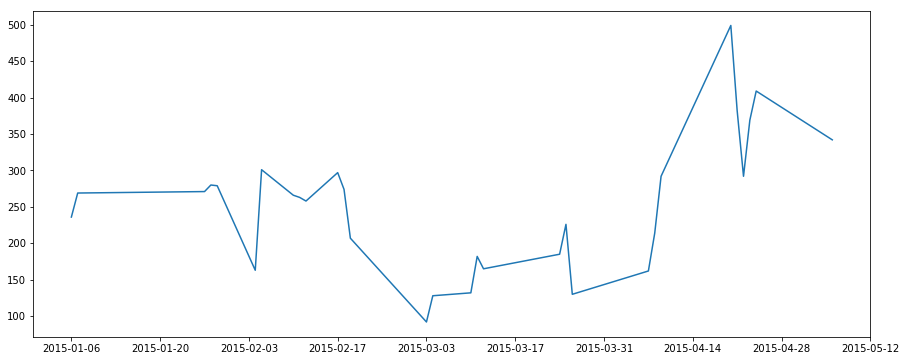

In [293]:
rmse = sqrt(mean_squared_error(X_final[:30], predictions[:30]))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(X_final[:30])
plt.show


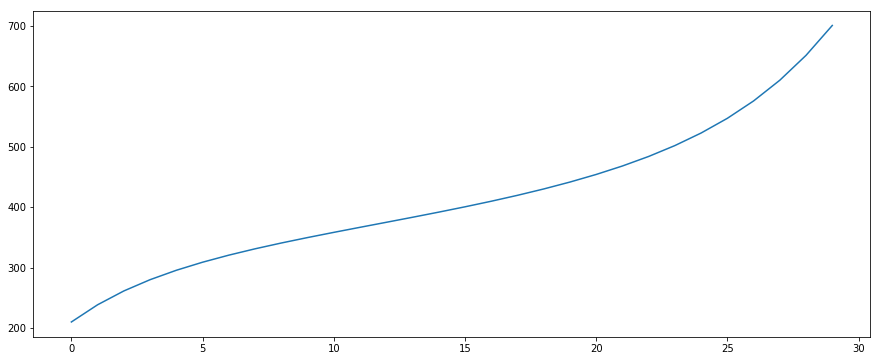

In [295]:
pyplot.plot(predictions[:30])
pyplot.show()

In [279]:
print X_final



Sampling_Date
2015-01-06    236.0
2015-01-07    269.0
2015-01-27    271.0
2015-01-28    280.0
2015-01-29    279.0
2015-02-04    163.0
2015-02-05    301.0
2015-02-10    266.0
2015-02-11    263.0
2015-02-12    258.0
2015-02-17    297.0
2015-02-18    274.0
2015-02-19    207.0
2015-03-03     92.0
2015-03-04    128.0
2015-03-10    132.0
2015-03-11    182.0
2015-03-12    165.0
2015-03-24    185.0
2015-03-25    226.0
2015-03-26    130.0
2015-04-07    162.0
2015-04-08    214.0
2015-04-09    292.0
2015-04-20    499.0
2015-04-21    382.0
2015-04-22    292.0
2015-04-23    369.0
2015-04-24    409.0
2015-05-06    342.0
              ...  
2015-09-02    134.0
2015-09-03    149.0
2015-09-08     81.0
2015-09-09    109.0
2015-09-10     97.0
2015-09-22     33.0
2015-09-23     58.0
2015-10-06    139.0
2015-10-07    173.0
2015-10-08    149.0
2015-10-13     98.0
2015-10-14    121.0
2015-10-15    178.0
2015-10-19    296.0
2015-11-03    457.0
2015-11-04    260.0
2015-11-05    101.0
2015-11-18    377.0
2015-1

ValueError: non-broadcastable output operand with shape (92,1) doesn't match the broadcast shape (92,2)

[[-0.13401231]
 [-0.17652158]
 [-0.20187031]
 [-0.23726207]
 [-0.25578195]
 [-0.02909318]
 [-0.18961245]
 [-0.19128329]
 [-0.1928966 ]
 [-0.18380859]
 [-0.25762713]
 [-0.25245646]
 [-0.12135545]
 [ 0.19615333]
 [ 0.35993078]
 [ 0.49262092]
 [ 0.49155948]
 [ 0.55216157]
 [ 0.55422997]
 [ 0.46941897]
 [ 0.64030755]
 [ 0.6668942 ]
 [ 0.59057999]
 [ 0.35643587]
 [-0.32673475]
 [-0.47375146]
 [-0.42633125]
 [-0.53661871]
 [-0.59930325]
 [-0.55058897]
 [-0.42591795]
 [-0.35456613]
 [-0.22592345]
 [-0.06519926]
 [ 0.06006467]
 [ 0.06639943]
 [-0.27730629]
 [ 0.00183728]
 [ 0.28019774]
 [ 0.32143995]
 [ 0.26272318]
 [ 0.33280447]
 [ 0.44320697]
 [ 0.56591129]
 [ 0.81381702]
 [ 0.92185926]
 [ 0.97505581]
 [ 1.04802656]
 [ 1.06690884]
 [ 1.10166836]
 [ 1.10132051]
 [ 1.07310891]
 [ 1.09550238]
 [ 1.14903009]
 [ 1.14433122]
 [ 1.14696956]
 [ 1.16292655]
 [ 1.16316628]
 [ 1.14858389]
 [ 1.11575174]
 [ 1.13415956]
 [ 1.09221482]
 [ 1.06271899]
 [ 1.04284072]
 [ 1.10601759]
 [ 1.08604217]
 [ 1.09598

Sampling_Date
2015-01-06    236.0
2015-01-07    269.0
2015-01-27    271.0
2015-01-28    280.0
2015-01-29    279.0
2015-02-04    163.0
2015-02-05    301.0
2015-02-10    266.0
2015-02-11    263.0
2015-02-12    258.0
2015-02-17    297.0
2015-02-18    274.0
2015-02-19    207.0
2015-03-03     92.0
2015-03-04    128.0
2015-03-10    132.0
2015-03-11    182.0
2015-03-12    165.0
2015-03-24    185.0
2015-03-25    226.0
2015-03-26    130.0
2015-04-07    162.0
2015-04-08    214.0
2015-04-09    292.0
2015-04-20    499.0
2015-04-21    382.0
2015-04-22    292.0
2015-04-23    369.0
2015-04-24    409.0
2015-05-06    342.0
              ...  
2015-09-02    134.0
2015-09-03    149.0
2015-09-08     81.0
2015-09-09    109.0
2015-09-10     97.0
2015-09-22     33.0
2015-09-23     58.0
2015-10-06    139.0
2015-10-07    173.0
2015-10-08    149.0
2015-10-13     98.0
2015-10-14    121.0
2015-10-15    178.0
2015-10-19    296.0
2015-11-03    457.0
2015-11-04    260.0
2015-11-05    101.0
2015-11-18    377.0
2015-1

In [298]:
data.head()



,Agency,City/Town/Village/Area,Location_of_Monitoring_Station,NO2,PM 2.5,RSPM/PM10,SO2,SPM,State,Stn Code,Type of Location
Sampling_Date,,,,,,,,,,,
2011-01-02,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",52.0,NaN,227.0,4.0,NaN,Delhi,55,"Residential, Rural and other Areas"
2011-01-02,Central Pollution Control Board,Delhi,"Pritampura, Delhi",44.0,NaN,196.0,4.0,NaN,Delhi,531,"Residential, Rural and other Areas"
2011-01-02,National Environmental Engineering Research In...,Delhi,"Town Hall, Ayurvedic Dispensary, Chandni Chowk...",98.0,NaN,262.0,6.0,NaN,Delhi,146,"Residential, Rural and other Areas"
2011-01-03,National Environmental Engineering Research In...,Delhi,"Mayapuri Industrial Area, Delhi",90.0,NaN,193.0,19.0,NaN,Delhi,345,Industrial Area
2011-01-03,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",53.0,NaN,198.0,4.0,NaN,Delhi,55,"Residential, Rural and other Areas"


In [299]:
print data.shape

(2760, 11)
